In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm


sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
import gsw
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)

rows = 720
cols = 600

['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


### Processing melt data

In [2]:
vars = ["budg2d_hflux_set1", "state_3D_mon_snap", "budg2d_snap_set1", "TS_AW_daily_snap", "budg2d_zflux_set1","EtaN_day_snap","TS_surf_daily_snap",
"budg2d_zflux_set2", "EtaN_mon_mean", "vel_3D_mon_mean","budg3d_hflux_set2", "exf_zflux_set1", "vel_3D_mon_snap",
"budg3d_kpptend_set1",
"budg3d_zflux_set2", "SI_daily_snap", "state_3D_mon_mean"]
path = '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/'

In [5]:
vars_2d = ['EtaN_day_snap','EtaN_mon_mean','SI_daily_snap','TS_surf_daily_snap','TS_AW_daily_snap','budg2d_zflux_set1','budg2d_zflux_set2','budg2d_hflux_set1','budg2d_snap_set1','exf_zflux_set1']

vars_3d = np.setxor1d(vars, vars_2d)

In [4]:
vars_3d

array(['budg3d_hflux_set2', 'budg3d_kpptend_set1', 'budg3d_zflux_set2',
       'state_3D_mon_mean', 'state_3D_mon_snap', 'vel_3D_mon_mean',
       'vel_3D_mon_snap'], dtype='<U19')

In [8]:
#file_files, file_filepaths = tools.get_data_paths_from_binary(path+'nc_files/', 'SI_daily_snap', file_end = 'nc' )


In [9]:
#SI = xr.open_mfdataset(file_filepaths)

In [10]:
#SI#.sel(variables='THETA').isel(time=20)['TS_AW_daily_snap'].plot()

In [6]:
melt_path = '/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/nc_files/dv/'

In [7]:
file_files, file_filepaths = tools.get_data_paths_from_binary(melt_path, '', file_end = 'nc' )


In [11]:
file_files

['L2_NEGIS_shelfice_SHFFWFLX.nc',
 'L2_NEGIS_shelfice_SHFFWFLX_4572000.0.nc',
 'L2_NEGIS_shelfice_SHFFWFLX_4731840.0.nc',
 'L2_NEGIS_shelfice_SHFFWFLX_50492160.0.nc']

In [26]:
def iter_number_to_date(iter_number,seconds_per_iter=60):

    total_seconds = iter_number*seconds_per_iter
    date = datetime(1992,1,1) + timedelta(seconds=total_seconds)
    # print(date)
    return(date)

In [12]:
melt1 = xr.open_mfdataset(file_filepaths[0])
melt2 = xr.open_mfdataset(file_filepaths[1])
melt3 = xr.open_mfdataset(file_filepaths[2])


In [23]:
melt1 = melt1.where(melt1.iterations>1356480).dropna(dim='iterations',how='all')


In [24]:
melt1.iterations

<xarray.DataArray 'iterations' (iterations: 31)>
array([ 8426880.,  8428320.,  8429760.,  8431200.,  8432640.,  8434080.,
        8435520.,  8436960.,  8438400.,  8439840.,  8441280.,  8442720.,
        8444160.,  8445600.,  8447040.,  8448480.,  8449920.,  8451360.,
        8452800.,  8454240.,  8455680.,  8457120.,  8458560.,  8460000.,
        8461440.,  8462880.,  8464320., 16836480., 16837920., 16839360.,
       50492160.], dtype=float32)
Coordinates:
  * iterations  (iterations) float32 8.427e+06 8.428e+06 ... 1.684e+07 5.049e+07

In [27]:
time_melt1 = []
melt1_iter = np.array(melt1.iterations)
for t in range(0,27):
    time_melt1.append(iter_number_to_date(melt1_iter[t],seconds_per_iter=30))
for t in range(27,30):
    time_melt1.append(iter_number_to_date(melt1_iter[t],seconds_per_iter=15))
time_melt1.append((iter_number_to_date(melt1_iter[-1],seconds_per_iter=5)))


True

In [31]:
melt1['iterations'] = time_melt1
melt1 = melt1.rename({'iterations':'time'})

In [37]:
melt1 = melt1.sortby(melt1.time)

<xarray.DataArray 'iterations' (iterations: 92)>
array([ 1270080.,  1271520.,  1272960.,  1274400.,  1275840.,  1277280.,
        1278720.,  1280160.,  1281600.,  1283040.,  1284480.,  1285920.,
        1287360.,  1288800.,  1290240.,  1291680.,  1293120.,  1294560.,
        1296000.,  1297440.,  1298880.,  1300320.,  1301760.,  1303200.,
        1304640.,  1306080.,  1307520.,  1308960.,  1310400.,  1311840.,
        1313280.,  1314720.,  1316160.,  1317600.,  1319040.,  1320480.,
        1321920.,  1323360.,  1324800.,  1326240.,  1327680.,  1329120.,
        1330560.,  1332000.,  1333440.,  1334880.,  1336320.,  1337760.,
        1339200.,  1340640.,  1342080.,  1343520.,  1344960.,  1346400.,
        1347840.,  1349280.,  1350720.,  1352160.,  1353600.,  1355040.,
        1356480.,  8426880.,  8428320.,  8429760.,  8431200.,  8432640.,
        8434080.,  8435520.,  8436960.,  8438400.,  8439840.,  8441280.,
        8442720.,  8444160.,  8445600.,  8447040.,  8448480.,  8449920.,
        8451360.,  8452800.,  8454240.,  8455680.,  8457120.,  8458560.,
        8460000.,  8461440.,  8462880.,  8464320., 16836480., 16837920.,
       16839360., 50492160.], dtype=float32)
Coordinates:
  * iterations  (iterations) float32 1.27e+06 1.272e+06 ... 1.684e+07 5.049e+07

In [51]:
time_melt2 = []
melt2_iter = np.array(melt2.iterations)
for t in range(0,len(melt2_iter)):
    time_melt2.append(iter_number_to_date(melt2_iter[t],seconds_per_iter=60))

melt2['iterations'] = time_melt2
melt2 = melt2.rename({'iterations':'time'})


<xarray.Dataset>
Dimensions:    (y: 720, x: 600, time: 223)
Coordinates:
  * x          (x) float32 4.025e+05 4.03e+05 4.035e+05 ... 7.015e+05 7.02e+05
  * y          (y) float32 -1.274e+06 -1.274e+06 ... -9.155e+05 -9.15e+05
  * time       (time) datetime64[ns] 2000-02-01 2000-02-02 ... 2000-09-10
Data variables:
    Longitude  (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
    Latitude   (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
    X          (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
    Y          (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
    SHFFWFLX   (time, y, x) float32 dask.array<chunksize=(223, 720, 600), meta=np.ndarray>

In [56]:
time_melt3 = []
melt3_iter = np.array(melt3.iterations)
for t in range(0,len(melt3_iter)):
    time_melt3.append(iter_number_to_date(melt3_iter[t],seconds_per_iter=60))

melt3['iterations'] = time_melt3
melt3 = melt3.rename({'iterations':'time'})


In [73]:
melt1

<xarray.Dataset>
Dimensions:    (y: 720, x: 600, time: 31)
Coordinates:
  * x          (x) float32 4.025e+05 4.03e+05 4.035e+05 ... 7.015e+05 7.02e+05
  * y          (y) float32 -1.274e+06 -1.274e+06 ... -9.155e+05 -9.15e+05
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-01-18
Data variables:
    Longitude  (y, x, time) float32 dask.array<chunksize=(720, 600, 31), meta=np.ndarray>
    Latitude   (y, x, time) float32 dask.array<chunksize=(720, 600, 31), meta=np.ndarray>
    X          (y, x, time) float32 dask.array<chunksize=(720, 600, 31), meta=np.ndarray>
    Y          (y, x, time) float32 dask.array<chunksize=(720, 600, 31), meta=np.ndarray>
    SHFFWFLX   (time, y, x) float32 dask.array<chunksize=(31, 720, 600), meta=np.ndarray>

In [76]:
melt1 = melt1.set_coords(['Latitude','Longitude'])
melt2 = melt2.set_coords(['Latitude','Longitude'])
melt3 = melt3.set_coords(['Latitude','Longitude'])

In [77]:
melt = xr.merge([melt1,melt2,melt3])

In [61]:
total_melt = melt['SHFFWFLX'].sum(dim='x').sum(dim='y')
total_melt = total_melt#.where(total_melt<-.25)
#total_melt.plot(marker='.')
#total_melt = total_melt.dropna(dim='iterations',how='all')
#melt1['SHFFWFLX']#.isel(iterations=0).plot()

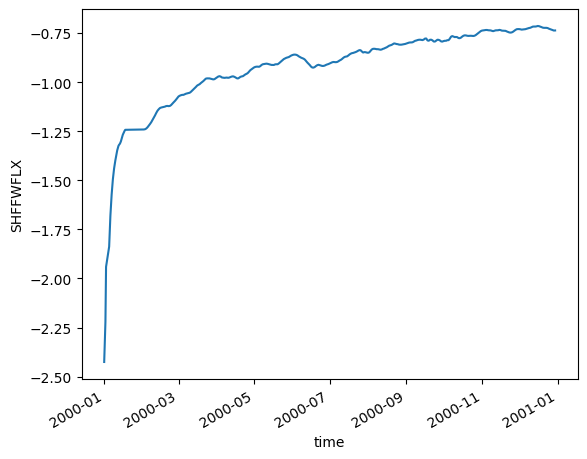

In [62]:
#time_ar
#total_melt = total_melt.rename({'iterations':'time'})
#total_melt['time']= time_ar

total_melt.plot()

In [81]:
melt['Longitude'] = np.array(melt.isel(time=50)['Longitude'])
melt['Latitude'] = np.array(melt.isel(time=50)['Latitude'])

In [86]:
lon = melt.isel(time=50)['Longitude'].drop_vars('time')
lat = melt.isel(time=50)['Latitude'].drop_vars('time')
melt['Longitude'] = lon
melt['Latitude'] = lat

In [87]:
melt

<xarray.Dataset>
Dimensions:    (x: 600, y: 720, time: 365)
Coordinates:
  * x          (x) float32 4.025e+05 4.03e+05 4.035e+05 ... 7.015e+05 7.02e+05
  * y          (y) float32 -1.274e+06 -1.274e+06 ... -9.155e+05 -9.15e+05
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-30
    Longitude  (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
    Latitude   (y, x) float32 dask.array<chunksize=(720, 600), meta=np.ndarray>
Data variables:
    X          (y, x, time) float32 dask.array<chunksize=(720, 600, 365), meta=np.ndarray>
    Y          (y, x, time) float32 dask.array<chunksize=(720, 600, 365), meta=np.ndarray>
    SHFFWFLX   (time, y, x) float32 dask.array<chunksize=(365, 720, 600), meta=np.ndarray>

In [88]:
melt.to_netcdf('/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/nc_files/NEGIS_melt_2000.nc')

In [ ]:
#name file per output so it doesnt over write
#issue with download output

### selecting for Zach to compare to Millian et al

In [3]:
melt = xr.open_dataset('/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/nc_files/NEGIS_melt_2000.nc')

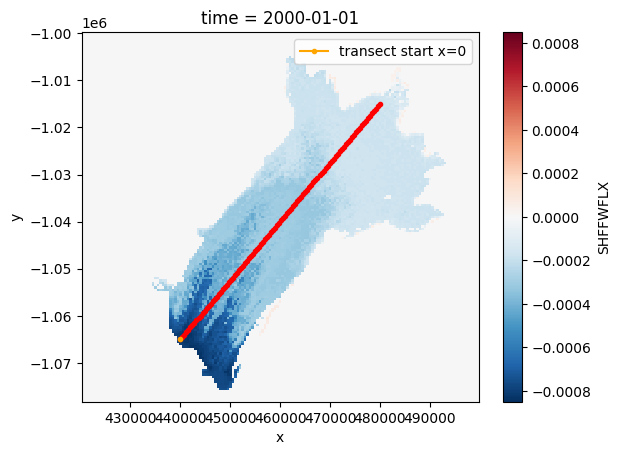

In [38]:
melt['SHFFWFLX'].isel(time=0).sel(y=slice(-1.078e6,-1e6),x=slice(420000,500000)).plot()
x_range = np.linspace(440000,480000,100)
y_range = np.linspace(-1.065e6,-1.015e6,100)
plt.plot(x_range,y_range,'r.')
plt.plot(x_range[0],y_range[0],'orange',marker='.',label='transect start x=0')
plt.legend()


In [17]:
x_dir = 480000-440000
y_dir = -1.065e6 +1.015e6
mag = np.sqrt(x_dir**2+y_dir**2)

dist = np.linspace(0,mag,100)

array([    0.        ,   646.780226  ,  1293.56045201,  1940.34067801,
        2587.12090401,  3233.90113002,  3880.68135602,  4527.46158202,
        5174.24180803,  5821.02203403,  6467.80226003,  7114.58248604,
        7761.36271204,  8408.14293804,  9054.92316405,  9701.70339005,
       10348.48361605, 10995.26384206, 11642.04406806, 12288.82429406,
       12935.60452007, 13582.38474607, 14229.16497207, 14875.94519808,
       15522.72542408, 16169.50565008, 16816.28587609, 17463.06610209,
       18109.84632809, 18756.6265541 , 19403.4067801 , 20050.1870061 ,
       20696.96723211, 21343.74745811, 21990.52768411, 22637.30791012,
       23284.08813612, 23930.86836212, 24577.64858813, 25224.42881413,
       25871.20904013, 26517.98926614, 27164.76949214, 27811.54971814,
       28458.32994415, 29105.11017015, 29751.89039615, 30398.67062216,
       31045.45084816, 31692.23107416, 32339.01130017, 32985.79152617,
       33632.57175217, 34279.35197818, 34926.13220418, 35572.91243018,
      

In [16]:
transect_lon = x_range
transect_lat = y_range

lon,lat = np.meshgrid(melt.x,melt.y)
Lon, Lat = lon,lat
points = np.column_stack([np.ravel(Lon), np.ravel(Lat)])

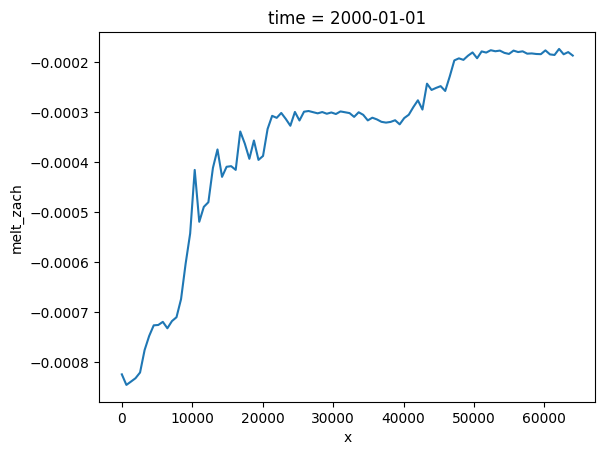

In [22]:
i=0
tran_cut_time_k = melt.isel(time=i)
time = [np.array(tran_cut_time_k.time)]
      
sampled_transect= griddata(points, np.array(melt['SHFFWFLX'].isel(time=i)).ravel(), (transect_lon, transect_lat))
sampled_transect = np.reshape(sampled_transect, (1,100))
Zach = xr.DataArray(sampled_transect ,coords=[time,dist],dims=['time','x'],name='melt_zach')


Zach.plot()

In [23]:
for i in tqdm(range(0,len(melt.time))):
    
        tran_cut_time_k = melt.isel(time=i)
        time = [np.array(tran_cut_time_k.time)]
      
        sampled_transect= griddata(points, np.array(melt['SHFFWFLX'].isel(time=i)).ravel(), (transect_lon, transect_lat))
        
        sampled_transect = np.reshape(sampled_transect, (1,100))
        Zach = xr.DataArray(sampled_transect ,coords=[time,dist],dims=['time','x'],name='melt_zach')
        
        Zach.to_netcdf('/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/nc_files/Zach_subsample/Melt_2000_Zach_'+str(i).zfill(4)+'.nc')
       

100%|█████████████████████████████████████████| 365/365 [43:17<00:00,  7.12s/it]


In [24]:
melt_files, melt_filepath = tools.get_data_paths_from_binary('/media/drdarby/Elements/data/N_Greenland/L2/NEGIS/nc_files/','Zach_subsample',file_end='nc')
melt_subsampled = xr.open_mfdataset(melt_filepath)

Text(0.5, 0, 'x [m]')

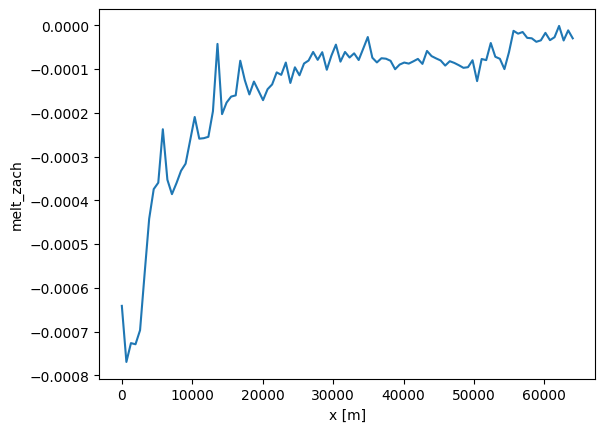

In [30]:
melt_subsampled['melt_zach'].mean(dim='time').plot()
plt.xlabel('x [m]')